In [ ]:
from langchain.chat_models import init_chat_model

# LLM base
llm = init_chat_model("openai:gpt-4o-mini", temperature=0.2)
print(llm.invoke("Hola, ¿quién eres?").content)


In [ ]:
from config.llm import llm_validacion

print(llm_validacion.invoke("Hola, ¿quién eres?").content)

In [ ]:
from config.llm import llm_validacion , prompt_validacion
from langchain_core.messages import SystemMessage, HumanMessage

respuesta = llm_validacion.invoke([
    SystemMessage(content=prompt_validacion),
    HumanMessage(content="Hola, ¿quién eres?")
])
print(respuesta.content)




In [ ]:
from config.llm import prompt_validacion

print(prompt_validacion)

In [ ]:
from utils.conversion import get_enum_names
from utils.enums import TipoCarroceria, TipoMecanica

#get_enum_names([TipoCarroceria.COMERCIAL, TipoCarroceria.PICKUP])

#Dos maneras de obtener los nombres de las clases enums
print("totalidad tipo carroceria:" , list(TipoCarroceria))
print("totalidad mecanica" , get_enum_names(list(TipoMecanica)))


# Creacion del Grafo

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


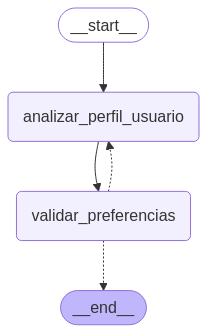

In [1]:
from langchain_core.messages import SystemMessage, HumanMessage
# Importar el constructor del grafo
from IPython.display import Image, display
from graph.perfil.builder import build_perfil_graph
# Construir el grafo
graph = build_perfil_graph()
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


## Prueba 1

In [2]:
from langchain_core.messages import HumanMessage, SystemMessage

# Create a thread
config = {"configurable": {"thread_id": "1"}}

# Start conversation
input_message = HumanMessage(content="oye busco un coche para la ciudad")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()


DEBUG ► respuesta.raw: preferencias_usuario=PerfilUsuario(altura_mayor_190=None, peso_mayor_100=None, uso_profesional=None, valora_estetica=None, solo_electricos=None, cambio_automatico=None, apasionado_motor=None, aventura=None) filtros_inferidos=FiltrosInferidos(batalla_min=None, indice_altura_interior_min=None, estetica_min=None, tipo_mecanica=None, premium_min=None, singular_min=None) mensaje_validacion='¿Qué tipo de coche prefieres: compacto, SUV, eléctrico? Y, ¿tienes alguna preferencia en cuanto a la estética o el tipo de transmisión?'
DEBUG ► response.preferencias_usuario: altura_mayor_190=None peso_mayor_100=None uso_profesional=None valora_estetica=None solo_electricos=None cambio_automatico=None apasionado_motor=None aventura=None
================================== Ai Message ==================================

Para ayudarte mejor, me gustaría saber si valoras la estética del coche. Además, ¿prefieres que solo busquemos vehículos eléctricos o no es un requisito?


In [ ]:
print(output['preferencias_usuario'])
print('-----------------------')
print(output['filtros_inferidos'])

In [3]:
# Create a thread
config = {"configurable": {"thread_id": "1"}}

# Start conversation
input_message = HumanMessage(content="si valoro la estetica y quiero que sea electrico esta bien ")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

DEBUG ► respuesta.raw: preferencias_usuario=PerfilUsuario(altura_mayor_190=None, peso_mayor_100=None, uso_profesional=None, valora_estetica='sí', solo_electricos='sí', cambio_automatico=None, apasionado_motor=None, aventura=None) filtros_inferidos=FiltrosInferidos(batalla_min=None, indice_altura_interior_min=None, estetica_min=7.0, tipo_mecanica=[<TipoMecanica.BEV: 'BEV'>], premium_min=None, singular_min=None) mensaje_validacion='¿Me puedes confirmar si prefieres vehículos con cambio automático? Y, ¿tienes alguna preferencia en cuanto a la aventura que buscas con el coche?'
DEBUG ► response.preferencias_usuario: altura_mayor_190=None peso_mayor_100=None uso_profesional=None valora_estetica='sí' solo_electricos='sí' cambio_automatico=None apasionado_motor=None aventura=None
================================== Ai Message ==================================

Perfecto, ya tenemos claro que valoras la estética y buscas un coche eléctrico con cambio automático. Ahora, ¿usarás el coche principa

In [4]:
# Create a thread
config = {"configurable": {"thread_id": "1"}}

# Start conversation
input_message = HumanMessage(content="lo usare para trabajo y con la 3 aventurero")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

DEBUG ► respuesta.raw: preferencias_usuario=PerfilUsuario(altura_mayor_190=None, peso_mayor_100=None, uso_profesional='sí', valora_estetica='sí', solo_electricos='sí', cambio_automatico=None, apasionado_motor=None, aventura='extrema') filtros_inferidos=FiltrosInferidos(batalla_min=None, indice_altura_interior_min=None, estetica_min=7.0, tipo_mecanica=[<TipoMecanica.BEV: 'BEV'>], premium_min=None, singular_min=None) mensaje_validacion='¿Prefieres que busquemos solo vehículos con cambio automático? Y, ¿te consideras apasionado del motor?'
DEBUG ► response.preferencias_usuario: altura_mayor_190=None peso_mayor_100=None uso_profesional='sí' valora_estetica='sí' solo_electricos='sí' cambio_automatico=None apasionado_motor=None aventura='extrema'
Query partes: ['eléctrico', 'diseño', 'profesional', 'profesional', 'entregas', 'transporte', 'carga', 'comercio', 'aventura extrema', 'off-road', 'terrenos difíciles', 'extrema', 'tracción 4x4']
================================== Ai Message =======

In [5]:
print(output['preferencias_usuario'])
print('-----------------------')
print(output['filtros_inferidos'])

{'altura_mayor_190': None, 'peso_mayor_100': None, 'uso_profesional': 'sí', 'valora_estetica': 'sí', 'solo_electricos': 'sí', 'cambio_automatico': 'si', 'apasionado_motor': None, 'aventura': 'extrema'}
-----------------------
{'batalla_min': None, 'indice_altura_interior_min': None, 'estetica_min': 5.0, 'tipo_mecanica': ['BEV'], 'premium_min': 1.0, 'singular_min': 1.0, 'tipo_carroceria': ['TODOTERRENO', 'SUV', 'PICKUP', 'DESCAPOTABLE']}


In [6]:
# Create a thread
config = {"configurable": {"thread_id": "1"}}

# Start conversation
input_message = HumanMessage(content="mido1.92 y peso 80kg")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

DEBUG ► respuesta.raw: preferencias_usuario=PerfilUsuario(altura_mayor_190='sí', peso_mayor_100='no', uso_profesional='sí', valora_estetica='sí', solo_electricos='sí', cambio_automatico='sí', apasionado_motor='null', aventura='extrema') filtros_inferidos=FiltrosInferidos(batalla_min=2800, indice_altura_interior_min=5000, estetica_min=7.0, tipo_mecanica=[<TipoMecanica.BEV: 'BEV'>], premium_min=1.0, singular_min=1.0) mensaje_validacion='¿Te consideras apasionado del motor?'
DEBUG ► response.preferencias_usuario: altura_mayor_190='sí' peso_mayor_100='no' uso_profesional='sí' valora_estetica='sí' solo_electricos='sí' cambio_automatico='sí' apasionado_motor='null' aventura='extrema'
Query partes: ['eléctrico', 'diseño', 'profesional', 'profesional', 'entregas', 'transporte', 'carga', 'comercio', 'aventura extrema', 'off-road', 'terrenos difíciles', 'extrema', 'tracción 4x4']
================================== Ai Message ==================================

¡Gracias por la información! Solo m

In [7]:
print(output['preferencias_usuario'])
print('-----------------------')
print(output['filtros_inferidos'])

{'altura_mayor_190': 'sí', 'peso_mayor_100': 'no', 'uso_profesional': 'sí', 'valora_estetica': 'sí', 'solo_electricos': 'sí', 'cambio_automatico': 'sí', 'apasionado_motor': 'null', 'aventura': 'extrema'}
-----------------------
{'batalla_min': 2800, 'indice_altura_interior_min': 5000, 'estetica_min': 5.0, 'tipo_mecanica': ['BEV'], 'premium_min': 1.0, 'singular_min': 1.0, 'tipo_carroceria': ['TODOTERRENO', 'SUV', 'PICKUP', 'DESCAPOTABLE']}


In [8]:
# Create a thread
config = {"configurable": {"thread_id": "1"}}

# Start conversation
input_message = HumanMessage(content="si soy un apasionado del motor")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

DEBUG ► respuesta.raw: preferencias_usuario=PerfilUsuario(altura_mayor_190='sí', peso_mayor_100='no', uso_profesional='sí', valora_estetica='sí', solo_electricos='sí', cambio_automatico='sí', apasionado_motor='sí', aventura='extrema') filtros_inferidos=FiltrosInferidos(batalla_min=2800, indice_altura_interior_min=5000, estetica_min=7.0, tipo_mecanica=[<TipoMecanica.BEV: 'BEV'>], premium_min=1.0, singular_min=1.0) mensaje_validacion='Con toda esta información, puedo buscar opciones ideales para ti. ¿Te gustaría que incluyera algún otro criterio o preferencia?'
DEBUG ► response.preferencias_usuario: altura_mayor_190='sí' peso_mayor_100='no' uso_profesional='sí' valora_estetica='sí' solo_electricos='sí' cambio_automatico='sí' apasionado_motor='sí' aventura='extrema'
Query partes: ['eléctrico', 'diseño', 'profesional', 'profesional', 'entregas', 'transporte', 'carga', 'comercio', 'aventura extrema', 'off-road', 'terrenos difíciles', 'extrema', 'tracción 4x4']
==============================

In [10]:
print(output['preferencias_usuario'])
print('-----------------------')
print(output['filtros_inferidos'])
print('-----------------------')
print(output['pesos'])

{'altura_mayor_190': 'sí', 'peso_mayor_100': 'no', 'uso_profesional': 'sí', 'valora_estetica': 'sí', 'solo_electricos': 'sí', 'cambio_automatico': 'sí', 'apasionado_motor': 'sí', 'aventura': 'extrema'}
-----------------------
{'batalla_min': 2800, 'indice_altura_interior_min': 5000, 'estetica_min': 5.0, 'tipo_mecanica': [<TipoMecanica.BEV: 'BEV'>], 'premium_min': 5.0, 'singular_min': 5.0, 'tipo_carroceria': ['TODOTERRENO', 'SUV', 'PICKUP', 'DESCAPOTABLE']}
-----------------------
{'estetica': 0.14285714285714285, 'premium': 0.14285714285714285, 'singular': 0.14285714285714285, 'altura_libre_suelo': 0.05714285714285714, 'traccion': 0.2857142857142857, 'reductoras': 0.22857142857142856}


In [ ]:
# Create a thread
#config = {"configurable": {"thread_id": "1"}}

# Start conversation
input_message = HumanMessage(content="si soy apasionado del motor")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

In [ ]:
# Start conversation
input_message = HumanMessage(content="la 3")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

In [ ]:
#print(output['preferencias_usuario'])
print('-----------------------')
print(output['filtros_inferidos'])
# print('-----------------------')
# print(output['pesos'])

OJO corregir: reductoras es un boolean por lo cual se debe enregar al otro agente de esa manera. altura como se esta gestionando, en la bd es alto.

In [ ]:
print(output.keys())

In [ ]:
state = graph.get_state(config).values
print(state["mensaje_validacion"])


## Prueba 2

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "2"}}

# Start conversation
input_message = HumanMessage(content="Quiero un coche mido 1.93. Peso 80 kg")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

In [ ]:
print(output['preferencias_usuario'])
print('---------------------------------------------------------------------')
print(output['filtros_inferidos'])


In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "2"}}

# Start conversation
input_message = HumanMessage(content="no, electrico no y con la 3, circular en condiciones extremas")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

In [ ]:
print(output['preferencias_usuario'])
print('---------------------------------------------------------------------')
print(output['filtros_inferidos']) #

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "2"}}

# Start conversation
input_message = HumanMessage(content="si para trabajo y puede ser tanto automatico como manual")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

In [ ]:
print(output['preferencias_usuario'])
print('---------------------------------------------------------------------')
print(output['filtros_inferidos']) 
print('---------------------------------------------------------------------')
#print(output['pesos'])

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "2"}}

# Start conversation
input_message = HumanMessage(content="si soy apasionado del motor y no me importa mucho la estetica")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

In [ ]:
print(output['preferencias_usuario'])
print('---------------------------------------------------------------------')
print(output['filtros_inferidos']) 

In [ ]:
config = {"configurable": {"thread_id": "2"}}
input_message = HumanMessage(content="vale manual entonces")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

In [ ]:
print(output['preferencias_usuario'])
print('---------------------------------------------------------------------')
print(output['filtros_inferidos'])
print('---------------------------------------------------------------------')
print(output['pesos'])

In [ ]:
print(output.keys())

In [ ]:
print(output['pesos'])

In [ ]:
state = graph.get_state(config).values
for m in state['messages']:
    m.pretty_print()
    
    

## Prueba 3

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

# Start conversation
input_message = HumanMessage(content="hola, dime quien eres?")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()


In [ ]:
print(output['preferencias_usuario'])
print('---------------------------------------------------------------------')
print(output['filtros_inferidos'])


In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

# Start conversation
input_message = HumanMessage(content="tienes motos?")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()


In [ ]:
print(output['preferencias_usuario'])
print('---------------------------------------------------------------------')
print(output['filtros_inferidos'])

In [ ]:
# Consultar todo el estado acumulado
state = graph.get_state(config).values
for m in state["messages"]:
    m.pretty_print()

## Prueba 4

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "4"}}

# Start conversation
input_message = HumanMessage(content="Quiero un coche elegante que usaré para trabajar todos los días. Me gustan los diseños llamativos. Mido 1.94")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

In [ ]:
print(output['preferencias_usuario'])
print('---------------------------------------------------------------------')
print(output['filtros_inferidos'])


In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "4"}}

# Start conversation
input_message = HumanMessage(content="si electrico estaria perfecto")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

In [ ]:
print(output['preferencias_usuario'])
print('---------------------------------------------------------------------')
print(output['filtros_inferidos'])

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "4"}}

# Start conversation
input_message = HumanMessage(content="automatico y peso menos de 100kg")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

In [ ]:
print(output['preferencias_usuario'])
print('---------------------------------------------------------------------')
print(output['filtros_inferidos'])

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "4"}}

# Start conversation
input_message = HumanMessage(content="si me apasionan los coches")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

In [ ]:
print(output['preferencias_usuario'])
print('---------------------------------------------------------------------')
print(output['filtros_inferidos'])

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "4"}}

# Start conversation
input_message = HumanMessage(content="si")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

# Prueba 5

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "5"}}

# Start conversation
input_message = HumanMessage(content="Dime quien eres")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

In [ ]:
# Create a thread
config = {"configurable": {"thread_id": "5"}}

# Start conversation
input_message = HumanMessage(content="tienes motos para recomendarme?")
output = graph.invoke({"messages": [input_message]}, config) 
for m in output['messages'][-1:]:
    m.pretty_print()

In [ ]:
state = graph.get_state(config).values
for m in state["messages"]:
    m.pretty_print()

## Objetivo
Crear un nuevo nodo en LangGraph llamado analizar_perfil_usuario que:

Reciba el mensaje del usuario.

Llame a un LLM con un SystemMessage especializado.

Devuelva un dict con tres secciones:

"perfil_usuario" → altura, peso, uso, gustos, etc.

"filtros_inferidos" → potencia_min, plazas_min, etc.

"mensaje_validacion"

Este resultado lo guardaremos en el state para luego usarlo al llamar buscar_producto_bd().

In [ ]:

# Configurar el cliente de BigQuery
client = bigquery.Client(project="thecarmentor-mvp2")

@tool
def buscar_producto_bd(consulta: str, filtros: dict = None):
    """
    Busca productos en la base de datos utilizando una consulta semántica en BigQuery.
    Tu objetivo es proporcionar respuestas precisas para ayudar en la búsqueda en el inventario de coches disponibles.
    
    Args:
        consulta (str): Consulta de texto para buscar productos similares.
    
    Returns:
        list[dict]: Resultados formateados como una lista de diccionarios con detalles de los productos más relevantes.
    """
    
    if not consulta.strip():
        raise ValueError("La consulta no puede estar vacía.")

    # Normalizar la consulta para que coincida con el formato de los embeddings.
    consulta_normalizada = normalize_text_sql(consulta)
    logging.debug(f"Consulta normalizada: {consulta_normalizada}")
    
    try:
        base_query = """
        WITH resultados_vector AS (
            SELECT 
                base.content AS nombre_coche,
                base.mecanica,
                base.price,
                base.KM,
                base.year,
                base.image_url,
                search_result.distance
            FROM VECTOR_SEARCH(
                TABLE `web_cars.coches_embeddingsV1`,
                'ml_generate_embedding_result',
                (SELECT * FROM ML.GENERATE_EMBEDDING(
                    MODEL `thecarmentor-mvp2.mymodel.modelembedding`,
                    (SELECT @consulta AS content),
                    STRUCT(TRUE AS flatten_json_output, 'SEMANTIC_SIMILARITY' AS task_type, 768 AS output_dimensionality)
                )),
                'ml_generate_embedding_result',
                top_k => 6
            ) AS search_result
        )
        SELECT * FROM resultados_vector
        WHERE 1=1
        """
        
        # Inicializar lista de condiciones y parámetros
        query_conditions = []
        # Usamos la consulta normalizada para la generación del embedding
        query_parameters = [bigquery.ScalarQueryParameter("consulta", "STRING", consulta_normalizada)]
        
        # Agregar condiciones dinámicamente según los filtros proporcionados
        if filtros:
            if 'precio_max' in filtros:
                query_conditions.append("price <= @precio_max")
                query_parameters.append(bigquery.ScalarQueryParameter("precio_max", "INT64", filtros["precio_max"]))
            if 'precio_min' in filtros:
                query_conditions.append("price >= @precio_min")
                query_parameters.append(bigquery.ScalarQueryParameter("precio_min", "INT64", filtros["precio_min"]))
            if 'year_min' in filtros:
                query_conditions.append("year >= @year_min")
                query_parameters.append(bigquery.ScalarQueryParameter("year_min", "INT64", filtros["year_min"]))
            if 'km_max' in filtros:
                query_conditions.append("KM <= @km_max")
                query_parameters.append(bigquery.ScalarQueryParameter("km_max", "INT64", filtros["km_max"]))

        # Si hay filtros, agregarlos a la consulta
        # if query_conditions:
        #     base_query += " AND " + " AND ".join(query_conditions)
        if query_conditions:
            base_query += " " + " AND ".join(query_conditions)


        logging.debug(f"Consulta SQL generada: {base_query}")
        logging.debug(f"Parámetros de consulta: {query_parameters}")

        # Ejecutar la consulta
        query_job = client.query(
            base_query, 
            job_config=bigquery.QueryJobConfig(query_parameters=query_parameters)
        )
        results = query_job.result().to_dataframe()
        # Ordenar los resultados por similitud
        if not results.empty:
            results = results.sort_values(by="distance", ascending=True)

        if results.empty:
            return [{"error": "No se encontraron resultados para la consulta y los filtros aplicados."}]
            
        formatted_results = [
            {
                "nombre_coche": row["nombre_coche"],
                "mecanica": row["mecanica"],
                "precio": row["price"],
                "kilometros": row["KM"],
                "año": row["year"],
                "imagen": row["image_url"],
                "similitud": round(row["distance"], 2)
            }
            for _, row in results.iterrows()
        ]
        return formatted_results

    except Exception as e:
        logging.error(f"Error al ejecutar la consulta: {e}", exc_info=True)
        return [{"error": "No se pudieron encontrar resultados."}]

# Definir herramientas
# tools = [buscar_producto_bd]



# Actualizar lista de herramientas
tools = [buscar_producto_bd]
llm_with_tools = llm.bind_tools(tools, parallel_tool_calls=True)


In [ ]:

sys_msg = SystemMessage(content="""Eres Mentor, un util y experto en la busqueda de coches.
INSTRUCCIONES IMPORTANTES:
**Antes de hacer una búsqueda en la base de datos, analiza la consulta y extrae solo la información clave.**  
   - Si el usuario menciona un coche, filtra la consulta para obtener solo **la marca, modelo, versión, tipo de motorización y año**.
   - **No incluyas frases completas del usuario como búsqueda.**  
   - **No pases palabras como "quiero", "busco", "auto", "coche", "modelo", "año" si no son parte del nombre oficial del coche.**
   - **Ejemplo:**  
     - Entrada: `"quiero coche bmw serie 1 120d hibrido año 2024"`  
     - **Consulta que debes generar:** `"bmw serie 1 120d hibrido 2024"`

**Definiendo Preferencias**
   - Para dar recomendaciones acertadas, puedes pedir al usuario que proporcione detalles sobre lo que busca:
     • ¿Tienes una **marca** preferida?
     • ¿Cuál es tu **presupuesto máximo**? (Opcional)
     • ¿Te importa el **kilometraje máximo**? (Opcional)
     • ¿Qué **años de antigüedad** son aceptables? (Opcional)

**Presentación de Resultados**
    - Aplica los filtros pero muestra también alguna alternativa fuera de los filtros si es muy relevante
    Usa este formato para cada coche encontrado: 
    ### [Modelo]
    ![Imagen del vehículo]([url_imagen])
     - **Precio:** [precio]€
     - **Kilómetros:** [km] km
     - **Mecánica:** [tipo]
     - **Año:** [year]
     - **Similitud con tu búsqueda:** [score]
 
** Ajustes**
   - Si no encuentras lo que buscas, dime si quieres:
   - Aumentar el **presupuesto** para ver modelos más recientes.
   - Ampliar el **kilometraje permitido** para más opciones.
   - Incluir **otros años** para expandir la búsqueda.
   
**Información Adicional**
   -usa la herramienta `buscar_info_adicional` para obtener información actualizada sobre un modelo específico de coche.
   - **Ejemplo:** `buscar_info_adicional("que caracteristicas tiene el BMW 320d 2019")`
""")
# - También puedo **comparar dos coches** si tienes modelos específicos en mente.
def assistant(state: MessagesState):
    """
    Función principal del asistente invocando una búsqueda.
    """
    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}


#    user_input = state["messages"][-1].content  # Último mensaje del usuario
# if detect_comparison_intent(user_input):
#         car1, car2 = extract_car_models_llm(user_input)
#         if car1 and car2:
#             car1_data, car2_data = obtener_datos_comparacion(car1, car2)
#             return {"messages": [comparar_coches_llm(car1_data, car2_data)]}
#         else:
#             return {"messages": ["No pude identificar claramente los coches a comparar. ¿Podrías mencionarlos nuevamente?"]}


In [ ]:
memory = MemorySaver()

# Graph
graph = StateGraph(MessagesState)

# Define nodes: these do the work
graph.add_node("assistant", assistant)
graph.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
graph.add_edge(START, "assistant")
graph.add_conditional_edges(
    "assistant",
    lambda state: logging.debug(f"tools_condition evalúa: {tools_condition(state)}") or tools_condition(state)
)
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
#     tools_condition,
# )
graph.add_edge("tools", "assistant")
graph = graph.compile(checkpointer=memory)
# Show
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
# Start conversation, again
config = {"configurable": {"thread_id": "1"}}

# Specify an input
input_message = HumanMessage(content="quiero coche bmw serie 1 120d hibrido año 2024")
output = graph.invoke({"messages": input_message}, config)

# Mostrar los mensajes resultantes del primer paso
for m in output["messages"]:
    m.pretty_print()

In [ ]:
# Start conversation, again
config = {"configurable": {"thread_id": "1"}}

# Specify an input
input_message = HumanMessage(content="kilometraje 50.000 y presupuesto no importa, muestrame todas las opciones")
output = graph.invoke({"messages": input_message}, config)

# Mostrar los mensajes resultantes del primer paso
for m in output["messages"]:
    m.pretty_print()

In [ ]:
# Start conversation, again
config = {"configurable": {"thread_id": "1"}}

# Specify an input
input_message = HumanMessage(content="podrias darme las caracteristicas del bmw serie 1 118i 2024 diesel")
output = graph.invoke({"messages": input_message}, config)

# Mostrar los mensajes resultantes del primer paso
for m in output["messages"]:
    m.pretty_print()

In [ ]:
# Start conversation, again
config = {"configurable": {"thread_id": "1"}}

# Specify an input
input_message = HumanMessage(content="si, dame las caracteristicas del El 118i a gasolina")
output = graph.invoke({"messages": input_message}, config)

# Mostrar los mensajes resultantes del primer paso
for m in output["messages"]:
    m.pretty_print()

In [ ]:
# Start conversation, again
config = {"configurable": {"thread_id": "2"}}

# Specify an input
input_message = HumanMessage(content="quiero un coche kia sportage a gasolina, puede ser año 2011 a 2020 y no importa el kilometraje")
output = graph.invoke({"messages": input_message}, config)

# Mostrar los mensajes resultantes del primer paso
for m in output["messages"]:
    m.pretty_print()

In [ ]:
# Start conversation
config = {"configurable": {"thread_id": "2"}}

# Specify an input
input_message = HumanMessage(content="maximo 25.000 euros")
output = graph.invoke({"messages": input_message}, config)

# Mostrar los mensajes resultantes del primer paso
for m in output["messages"]:
    m.pretty_print()

In [ ]:
config = {"configurable": {"thread_id": "3"}}

# Specify an input
input_message = HumanMessage(content="Mentor quiero un coche familiar, me podrias recomendar alguno?")
output = graph.invoke({"messages": input_message}, config)

# Mostrar los mensajes resultantes del primer paso
for m in output["messages"]:
    m.pretty_print()

In [ ]:
# Start conversation, again
config = {"configurable": {"thread_id": "3"}}

# Specify an input
input_message = HumanMessage(content="segun tu conocimiento que me recomiendas?")
output = graph.invoke({"messages": input_message}, config)

# Mostrar los mensajes resultantes del primer paso
for m in output["messages"]:
    m.pretty_print()

In [ ]:
# Start conversation, again
config = {"configurable": {"thread_id": "3"}}

# Specify an input
input_message = HumanMessage(content="pues SUV estaria bien y presupuesto hasta  12.000")
output = graph.invoke({"messages": input_message}, config)

# Mostrar los mensajes resultantes del primer paso
for m in output["messages"]:
    m.pretty_print()

In [ ]:
# Start conversation, again
config = {"configurable": {"thread_id": "3"}}

# Specify an input
input_message = HumanMessage(content="diesel o gasolina esta bien")
output = graph.invoke({"messages": input_message}, config)

# Mostrar los mensajes resultantes del primer paso
for m in output["messages"]:
    m.pretty_print()

In [ ]:
# Start conversation, again
config = {"configurable": {"thread_id": "3"}}

# Specify an input
input_message = HumanMessage(content="vale maximo 10 años")
output = graph.invoke({"messages": input_message}, config)

# Mostrar los mensajes resultantes del primer paso
for m in output["messages"]:
    m.pretty_print()